# Pymaceuticals Inc.
---

### Analysis

- Given the most recent data, the drug of interest, Capomulin, has shown great promise. When compared to it's counterparts, Capomulin stands to be one of the top drugs of choice. However, Ramicane also proves to be as effective as Capomulin, with a possibility of being even more effective. When comparinng Capomulin and Ramicane, Ramicane's tumor statistics show a slight advantage over Capomulin with a Mean Tumor Volume: 40.217 and a Tumor Volume Standard Deviation: 4.846 as opposed to Capomulin's Mean Tumor Volume: 40.676 and Tumor Volume Standard Deviation: 4.994. This is indicative of how large the average tumor volume resulted in over time for each mice and its relativity to the meann tumor volume. Both Capomulin and Ramicane show very similar results, but Ramicane leading just slightly in these statistical tests.

- Based on Figure 2, the gender or sex of a mice may not necessarily factor into tumor volume. A closer look into the correlation between tumor volume and sex/gender would need to be considered before making a definitive conclusion.

- However, based on Figure 5, there is a strong correlation between tumor volume and mice weight. With an r-value of 0.84, it is very likely to be considered a strong, positive correlation between both factors
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
# Display the data table for preview
#merge_df = pd.merge(state_avg_df, state_totals_df, on=("Year", "State"))
merge_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice.
# Display the number of unique mice IDs
#merge_df["Mouse ID"].unique()
unique_mice = len((merge_df["Mouse ID"]).value_counts())
unique_mice

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# pandas.DataFrame.duplicated(subset=None, keep= ‘first’)
duplicated_df = merge_df.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)
duplicated_df

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [10]:
duplicated_id = merge_df.loc[duplicated_df,"Mouse ID"].unique()
duplicated_id

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
# Search for duplicated ID in column Mouse Id 
duplicated_mice_data = merge_df.loc[merge_df['Mouse ID'] == duplicated_id[0]]
duplicated_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False) or
# DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
clean_df = merge_df.drop(duplicated_mice_data.index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
# unique_mice = len((merge_df["Mouse ID"]).value_counts())
clean_no_dupe = len((clean_df["Mouse ID"]).value_counts())
clean_no_dupe

248

## Summary Statistics

In [14]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_df.groupby(clean_df["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [16]:
tumor_median = clean_df.groupby(clean_df["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [17]:
tumor_var = clean_df.groupby(clean_df["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [18]:
tumor_stdev = clean_df.groupby(clean_df["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_stdev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Stand_error = [sem(sample[‘Combined MPG’].mean() for sample in vehicle_sample_set]
tumor_sem = clean_df.groupby(clean_df["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [20]:
tumor_df = pd.DataFrame(
    {"Mean Tumor Volume":tumor_mean,
     "Median Tumor Volume":tumor_median,
     "Tumor Volume Variance":tumor_var,
     "Tumor Volume Std. Dev.":tumor_stdev,
     "Tumor Volume Std. Err.":tumor_sem
    })
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
# result = df.groupby('Courses').aggregate({'Duration':'count','Fee':['min','max']})
# result = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
result = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
result

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [23]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data1 = clean_df.groupby(['Drug Regimen']).count()['Timepoint']
bar_data1

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

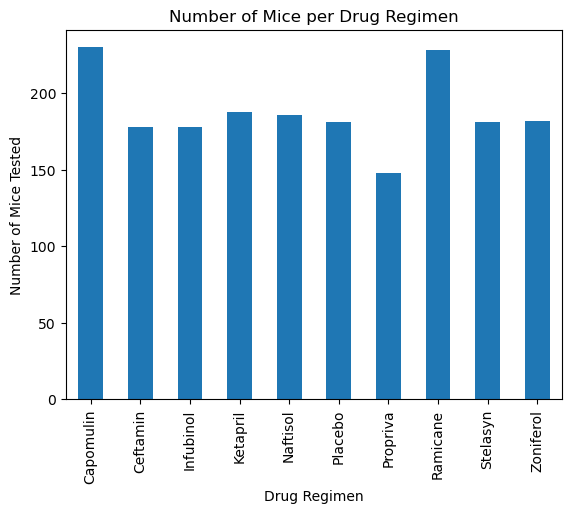

In [25]:
bar1 = bar_data1.plot(kind='bar', title='Number of Mice per Drug Regimen',\
                         xlabel="Drug Regimen",ylabel="Number of Mice Tested")
plt.show()

In [26]:
# Convert pandas dataframe to NumPy array
# gives y-axis
y_axis = bar_data1.to_numpy()
y_axis

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182], dtype=int64)

In [27]:
x_axis = np.arange(len(bar_data1))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
# indexes the y-axis value
drug_name = list(bar_data1.index)
drug_name

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

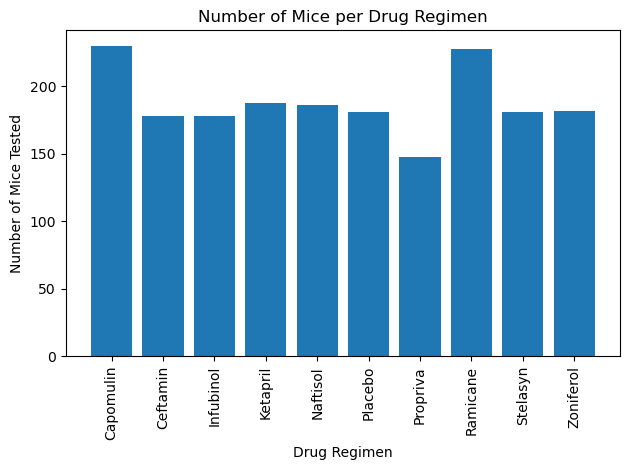

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar2 = plt.bar(x_axis,y_axis)
plt.xticks(x_axis,drug_name,rotation='vertical')
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

In [32]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_df.groupby(['Sex'])['Sex'].count()
pie_data

Sex
Female    922
Male      958
Name: Sex, dtype: int64

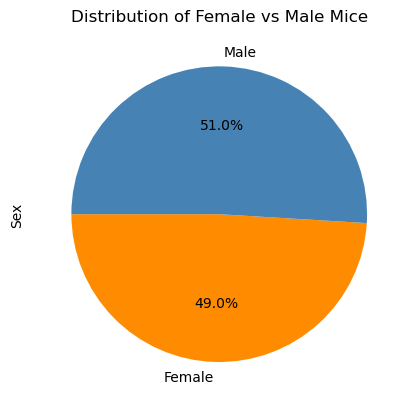

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors=['darkorange','steelblue']
pie1 = pie_data.plot(kind='pie',title='Distribution of Female vs Male Mice',\
                         y="Sex",autopct='%1.1f%%',colors=colors,startangle=180)

plt.show()

In [38]:
# gives the x-axis
x_axis = list(pie_data.index)
x_axis

['Female', 'Male']

In [39]:
# gives the y-axis
y_axis = list(pie_data)
y_axis

[922, 958]

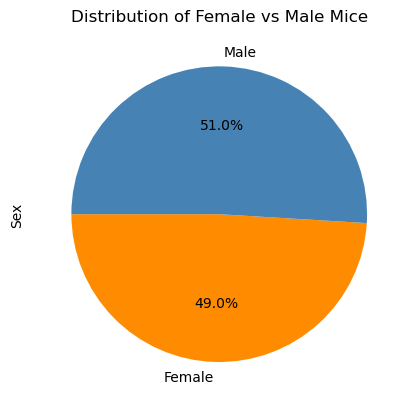

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=['darkorange','steelblue']
pie2 = plt.pie(y_axis,labels=x_axis,colors=colors,autopct='%1.1f%%',startangle=180)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
clean_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()
final_tumor_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset
    # add to empty list
    final_tumor_vol_list.append(final_tumor_vol)
    
    # calculate quartiles & bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    
    # Print out the result
    print(f"{drug} Drug Regimen")
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile is: {iqr}")
    print('----------------------------------------------------------')

Capomulin Drug Regimen
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile is: 7.781863460000004
----------------------------------------------------------
Ramicane Drug Regimen
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile is: 9.098536719999998
----------------------------------------------------------
Infubinol Drug Regimen
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile is: 11.477135160000003
----------------------------------------------------------
Ceftamin Drug Regimen
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile is: 15.57775

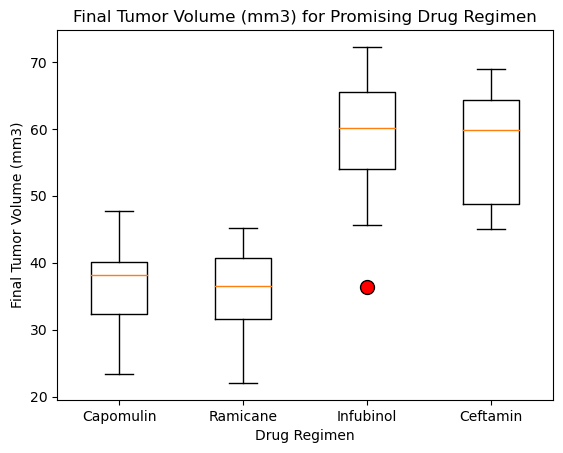

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, 
#positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, 
#conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, 
#showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, 
#capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)[source]

final_tumor_plot = plt.boxplot(final_tumor_vol_list, labels=treatments,flierprops={'markerfacecolor':'r','markersize': 10})
plt.title("Final Tumor Volume (mm3) for Promising Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#x-axis = timepoint
#y-axis = tumor volume
#plt.plot(x,y)
capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin',:]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [51]:
capomulin_df['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [52]:
r157_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'r157',:]
r157_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


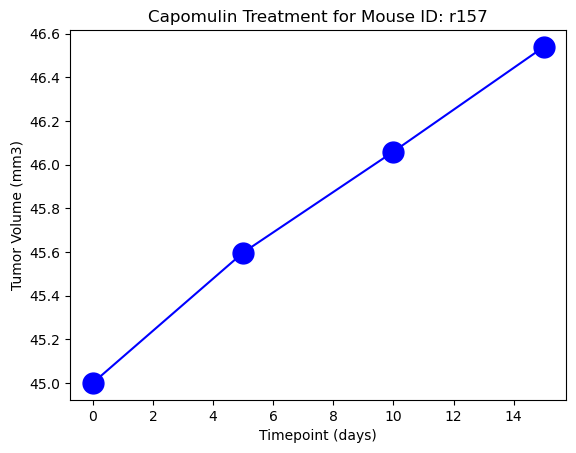

In [53]:
x_axis = r157_df['Timepoint']
y_axis = r157_df['Tumor Volume (mm3)']
line_plot = plt.plot(x_axis,y_axis,markersize=15,marker='o',color='blue')
plt.title("Capomulin Treatment for Mouse ID: r157")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average = capomulin_df.groupby(['Mouse ID']).mean()
average.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


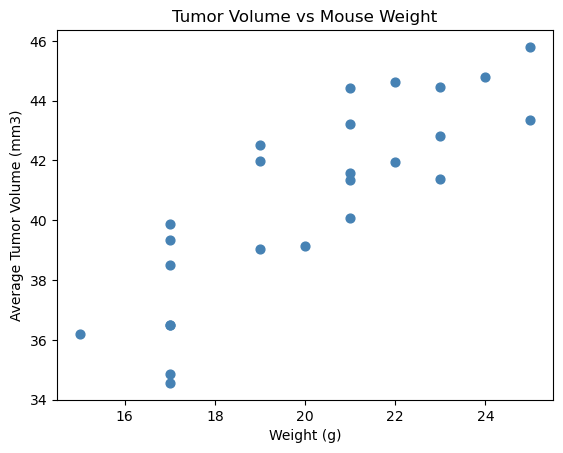

In [56]:
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'],s=40, color="steelblue")
plt.title('Tumor Volume vs Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


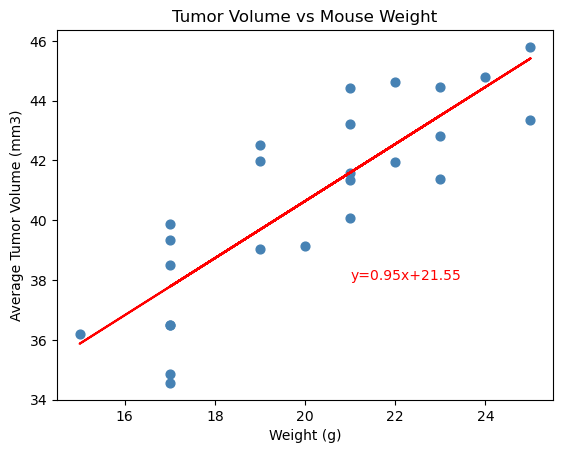

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# correlation = st.pearsonr(color_intensity,alcohol)
correlation = st.pearsonr(average['Weight (g)'],average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'],s=40, color="steelblue")
plt.title('Tumor Volume vs Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

(slope,intercept,rvalue,pvalue,stderr) = linregress(average['Weight (g)'],average['Tumor Volume (mm3)'])
regress_values = (average['Weight (g)'])*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot((average['Weight (g)']),regress_values,"r-")
plt.annotate(line_eq,(21,38),fontsize=10,color='red')
plt.show()